In [44]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime, timedelta
import altair as alt
from pandas.io.json import json_normalize
import requests
import yahoo_fin.stock_info as yf
from alpha_vantage.fundamentaldata import FundamentalData
import json
from fbprophet import Prophet 

D = 400
date_D_days_ago = datetime.now() - timedelta(days=D)
now = datetime.now()

start_date = date_D_days_ago.strftime('%F')
end_date = now.strftime('%F')

apikey='2HCDHLMKIK99309W'
tech_stocks = ['AAPL', 'MSFT', 'INTC']


tech_stocks[0]


# Operating CashFlow minus Capital Expenditures


'AAPL'

In [45]:
#Get Data from Yahoo
def StockData(ticker, start_d, end_d):
    data = web.get_data_yahoo(ticker, start = start_d, end = end_d)
    price =  pd.DataFrame(data['Adj Close'])
    
    #volume = pd.DataFrame(data['Volume'])
    return price

In [89]:
price = StockData(tech_stocks,start_date,end_date)

In [90]:
test = price[tech_stocks[0]].reset_index()

test.rename(columns ={'Date':'ds','AAPL':'y'}, inplace=True)

In [48]:
prophet = Prophet()
prophet.fit(test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future_prices=prophet.make_future_dataframe(periods=365)
future = prophet.predict(future_prices)

In [70]:
f = future[['ds','trend','yhat_lower','yhat_upper']]

In [71]:
f

,ds,trend,yhat_lower,yhat_upper
0,2020-01-06,79.921370,75.498312,86.577388
1,2020-01-07,79.728445,75.274003,86.529657
2,2020-01-08,79.535519,75.349201,86.313499
3,2020-01-09,79.342593,75.500538,86.238107
4,2020-01-10,79.149667,74.316914,85.993258
...,...,...,...,...
636,2022-02-04,219.698731,128.461097,308.846523
637,2022-02-05,219.928733,124.021081,305.947805
638,2022-02-06,220.158734,123.682260,307.104032
639,2022-02-07,220.388736,127.300238,312.926335


In [72]:

f = f.melt('ds', var_name='bands', value_name='price')
f

,ds,bands,price
0,2020-01-06,trend,79.921370
1,2020-01-07,trend,79.728445
2,2020-01-08,trend,79.535519
3,2020-01-09,trend,79.342593
4,2020-01-10,trend,79.149667
...,...,...,...
1918,2022-02-04,yhat_upper,308.846523
1919,2022-02-05,yhat_upper,305.947805
1920,2022-02-06,yhat_upper,307.104032
1921,2022-02-07,yhat_upper,312.926335


In [75]:
pic = alt.Chart(f).mark_line().encode(
        x='ds:T',
        y='price:Q',
        color='bands:N', tooltip=['bands:N', 'ds:N','price:N']
    )

In [76]:
pic

alt.Chart(...)

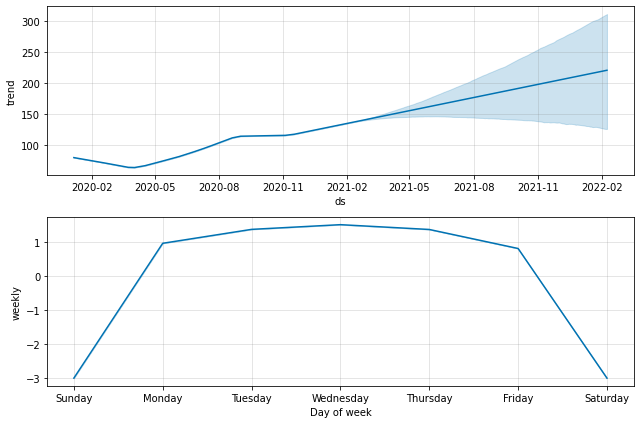

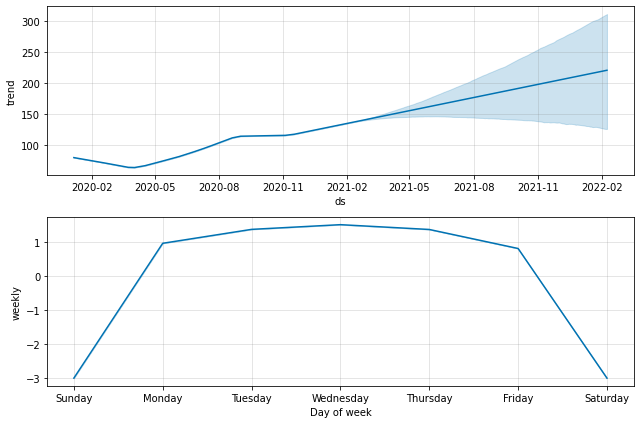

In [78]:
prophet.plot_components(future)

In [92]:
test.columns = ['a','b']

In [93]:
test


,a,b
0,2020-01-06,74.197395
1,2020-01-07,73.848442
2,2020-01-08,75.036385
3,2020-01-09,76.630219
4,2020-01-10,76.803459
...,...,...
271,2021-02-02,134.788589
272,2021-02-03,133.740158
273,2021-02-04,137.184998
274,2021-02-05,136.759995
